In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 438s 3us/step


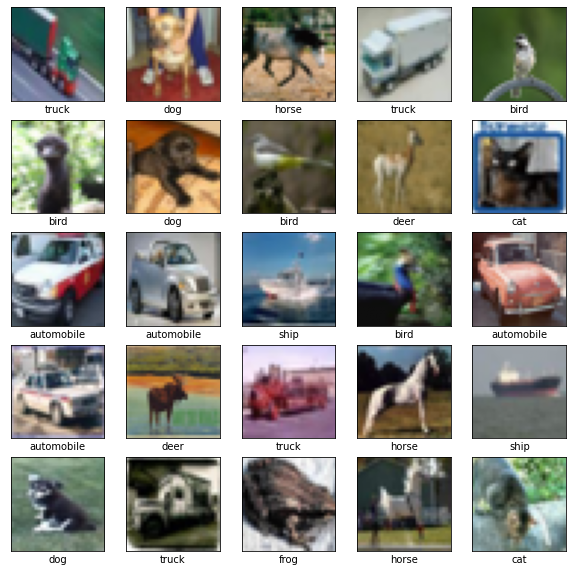

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# print(train_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i + 50])

    plt.xlabel(class_names[train_labels[i + 50][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [6]:
# Train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4780 - accuracy: 0.4625 - val_loss: 1.2287 - val_accuracy: 0.5645
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1120 - accuracy: 0.6079 - val_loss: 1.0507 - val_accuracy: 0.6261
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9714 - accuracy: 0.6571 - val_loss: 0.9725 - val_accuracy: 0.6652
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8731 - accuracy: 0.6939 - val_loss: 0.9437 - val_accuracy: 0.6735
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8086 - accuracy: 0.7153 - val_loss: 0.9196 - val_accuracy: 0.6802
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7521 - accuracy: 0.7347 - val_loss: 0.8910 - val_accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6960 - accuracy: 0.7567 - val_loss: 0.8625 -

313/313 - 1s - loss: 0.8964 - accuracy: 0.7066 - 1s/epoch - 4ms/step


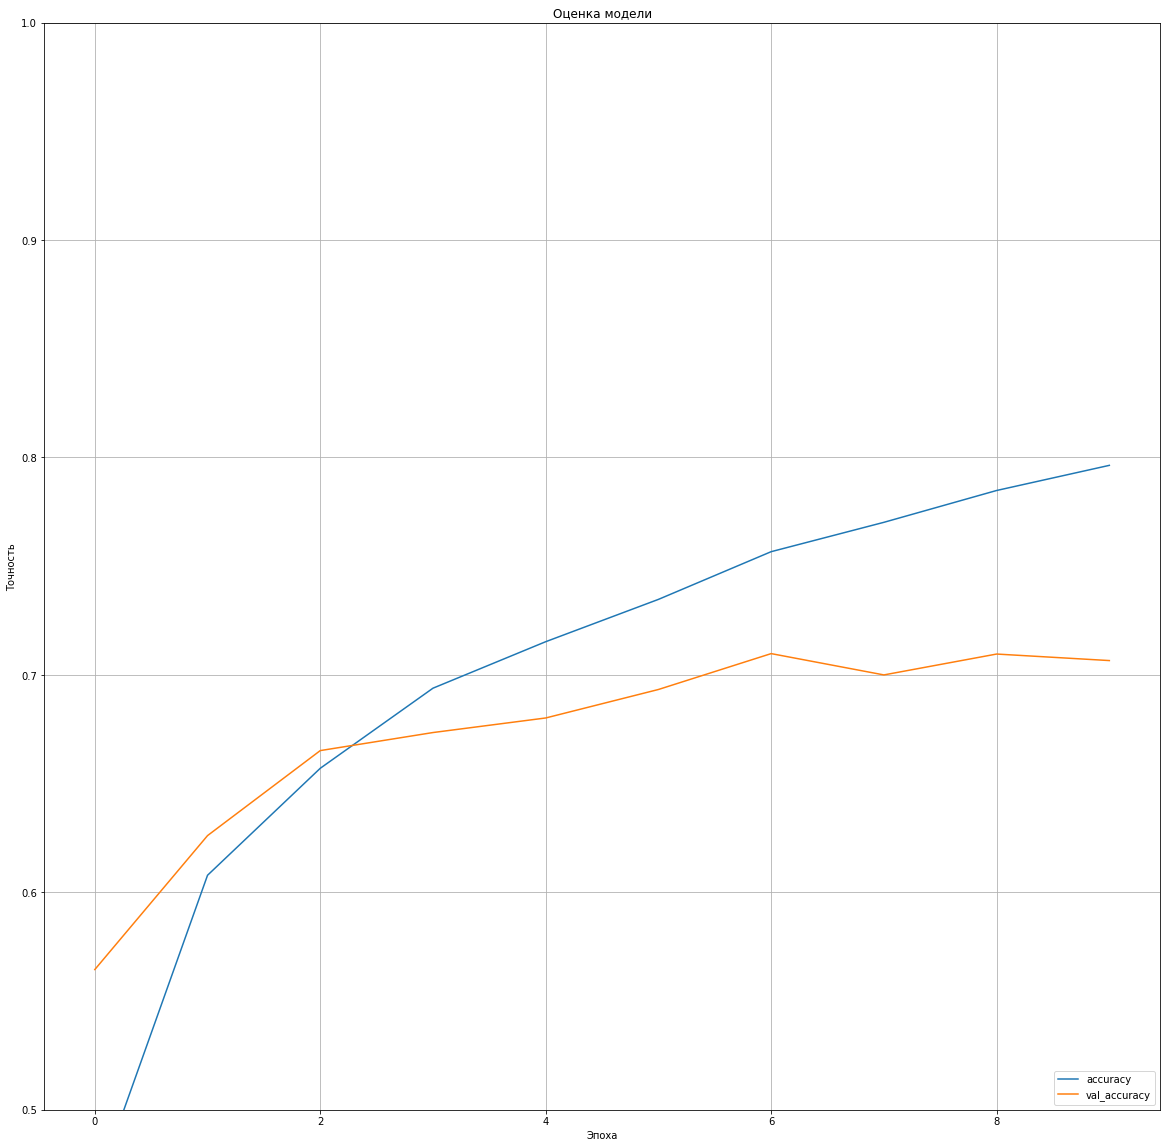

In [7]:
# Model evaluation
plt.figure(figsize=(20,20))
plt.title('Оценка модели')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.ylim([0.5, 1])
plt.grid()
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)